# Edge DP algorithms for degree distribution 

In [1]:
import util

#Hay et al. ICDM'09 (baseline)
def edgedp_deg_his_lap(G, max_deg, epsilon):
    degHis = util.get_deg_his(G, max_deg)
    sens = 4.0
    noisy_his = util.add_laplace(degHis, sens, epsilon)
    noisy_his = util.post_process_pdf(noisy_his, len(G.nodes()))
    return noisy_his


#Hay et al. ICDM'09, Proserpio et al. WOSN'12 (wPINQ)
def edgedp_deg_seq_lap(G, max_deg, epsilon):
    degSeq = np.array(util.get_sorted_deg_seq(G))
    sens = 2.0
    noisy_seq = util.add_laplace(degSeq, sens,epsilon)
    noisy_seq = util.post_process_cdf(noisy_seq, max_deg)
    noisy_his = util.deg_seq_to_deg_his(noisy_seq, max_deg)
    return noisy_his



## Evaluation

In [ ]:
import constants
import networkx as nx
import numpy as np

algos = ["edgeDP_degHis_Lap", "edgeDP_degSeq_Lap"]
epsilon_list = [0.01,0.02,0.05,0.1,0.2,0.5,1.0,2.0,5.0,10.0]
repeats = 3

data_dir = "data/" # REPLACE WITH YOUR DATASET DIRECTORY
data_key = 2
data_file = data_dir + constants.DATASETS[data_key]

G = nx.read_edgelist(data_file, nodetype=int)

num_nodes = len(G.nodes()) # assume this is given
max_deg = num_nodes - 1  

true_histogram = util.get_deg_his(G, max_deg)

errors = []
stds = []
for algo in algos:
    algo_errors = []
    algo_stds = []
    
    for epsilon in epsilon_list:
        temp_errors = []
        for i in range(repeats):
            noisy_histogram = np.zeros(max_deg + 1)
            if algo == "edgeDP_degHis_Lap":        
                noisy_histogram = edgeDP_deg_his_lap(G,max_deg,epsilon)
            elif algo == "edgeDP_degSeq_Lap":
                noisy_histogram = edgeDP_deg_seq_lap(G,max_deg,epsilon)
            noisy_pdf = noisy_histogram / num_nodes
            error = util.dif_deg_his_L1(true_histogram/num_nodes, noisy_pdf)
            temp_errors.append(error)
        algo_errors.append( np.mean(temp_errors))
        algo_stds.append(np.std(temp_errors))
        
    errors.append(algo_errors)
    stds.append(algo_stds)



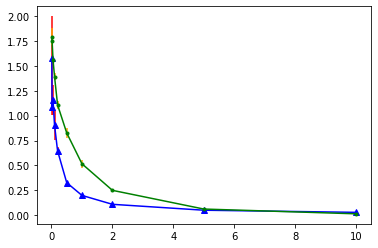

In [22]:
import matplotlib.pyplot as plt

plt.errorbar(epsilon_list, errors[0], yerr=stds[0], marker='^', ecolor='red', c='orange')
plt.errorbar(epsilon_list, errors[1], yerr=stds[1], marker='.', ecolor='blue', c='green')
plt.show()